## Overview

This attempts to describe kernels. The hope is after going through this, the reader appreciates just how powerful kernels are, and the central role they play in Gaussian process models. 

In [4]:
### Data 
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

### Mercer's theorem (kernels $\rightarrow$ feature maps)

Now, we shall be interested in mapping from a kernel to a feature map. This leads us to **Mercer's theorem**, which states that: *A symmetric function $k \left( \mathbf{x}, \mathbf{x}' \right)$  can be expressed as the inner product*

$$
k \left( \mathbf{x}, \mathbf{x}' \right) = \phi^{T} \left( \mathbf{x} \right) \phi \left( \mathbf{x}'\right) = \left\langle \phi \left( \mathbf{x} \right), \phi\left( \mathbf{x}' \right) \right\rangle 
$$

for some feature map $\phi$ if and only if $k \left( \mathbf{x}, \mathbf{x}' \right)$ is positive semidefinite, i.e.,

$$
\int k \left( \mathbf{x}, \mathbf{x}' \right) g \left(  \mathbf{x} \right)  g \left(  \mathbf{x}' \right) d \mathbf{x} d \mathbf{x}' \geq 0 
$$

for all real $g$. 

One possible set of features corresponds to eigenfunctions. A function $\nu\left( \mathbf{x} \right)$ that satisfies the integral equation

$$
\int k \left( \mathbf{x}, \mathbf{x}' \right) \nu \left( \mathbf{x} \right) d  \mathbf{x}  = \lambda  \nu \left( \mathbf{x} \right)
$$

is termed an eigenfunction of the kernel $k$. In the expression above, $\lambda$ is the corresponding eigenvalue. While the integral above is taken with respect to $\mathbf{x}$, more formally, it can be taken with respect to either a density $\rho \left( \mathbf{x} \right)$, or the Lebesgue measure over a compact subset of $\mathbb{R}^{D}$, which reduces to $d \mathbf{x}$. The eigenfunctions form an orthogonal basis and thus

$$
\int \nu_{i} \left( \mathbf{x} \right) \nu_{j} \left( \mathbf{x} \right) d \mathbf{x} = \delta_{ij}
$$

where $\delta_{ij}$ is the Kronecker delta. When $i=j$, its value is $1$; zero otherwise. Thus, one can define a kernel using its eigenfunctions

$$
k \left(  \mathbf{x}, \mathbf{x}' \right) = \sum_{i=1}^{\infty} \lambda_i \nu \left( \mathbf{x} \right) \nu \left( \mathbf{x}' \right). 
$$

## Numerical solution

If the covariance matrix is already available, one write its eigendecomposition

$$
\mathbf{K} = \mathbf{V} \boldsymbol{\Lambda} \mathbf{V}^{T}
$$

where $\mathbf{V}$ is a matrix of formed by the eigenvectors of $\mathbf{K}$ and $\boldsymbol{\Lambda}$ is a diagonal matrix of its eigenvalues, i.e.,

$$
\mathbf{V} = \left[\begin{array}{cccc}
| & | &  & |\\
\mathbf{v}_{1} & \mathbf{v}_{2} & \ldots & \mathbf{v}_{N}\\
| & | &  & |
\end{array}\right], \; \; \; \; \textrm{and} \; \; \; \; \boldsymbol{\Lambda}=\left[\begin{array}{cccc}
\lambda_{1}\\
 & \lambda_{2}\\
 &  & \ddots\\
 &  &  & \lambda_{N}
\end{array}\right],
$$

where $\lambda_1 \geq \lambda_2 \geq \ldots \lambda_{N} \geq 0$. This expansion permits one to express each element of $\mathbf{K}$ as

$$
\mathbf{K} = \sum_{i=1}^{N} \left( \sqrt{\lambda_{i}} \mathbf{v}_{i} \right) \left(  \sqrt{\lambda_{i}} \mathbf{v}_{i}\right)^{T}. 
$$

Beyond numerical solutions, for many kernels there exists analytical solutions for the eigenvalues and eigenvectors. For further details please see page 97 in RW. For now, we simply consider numerical solutions as shown below.

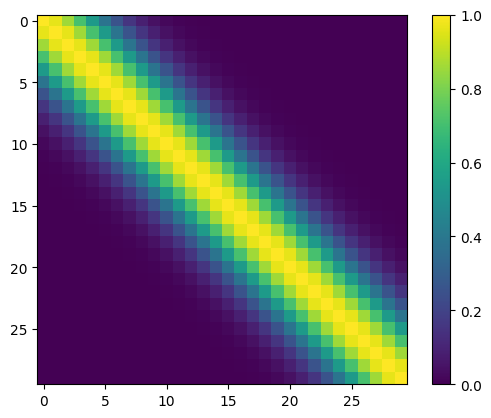

In [6]:
N = 30
x = np.linspace(-2, 2, N).reshape(N,1)
R = (np.tile(x, [1, N]) - np.tile(x.T, [N, 1]))**2
l = 0.5
K = np.exp(-0.5 * R * 1/l**2)

fig = plt.figure()
d = plt.imshow(K)
plt.colorbar(d)
plt.title('Squared exponential')
plt.show()

In [7]:
Lambda, V = np.linalg.eigh(K)
idx = Lambda.argsort()[::-1]
lambdas = Lambda[idx]
V = V[:, idx]

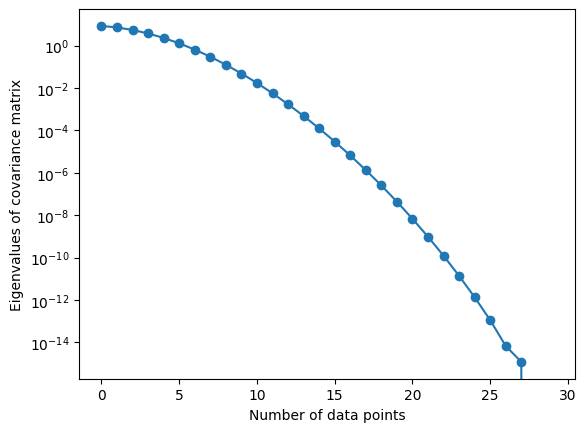

In [10]:
fig = plt.figure()
plt.semilogy(lambdas, 'o-')
plt.ylabel('Eigenvalues of covariance matrix (log)')
plt.xlabel('Number of data points')
plt.show()

In [25]:
T = 5 # truncated basis
K_approx = np.zeros((N, N))
for i in range(0, T):
    feature = (np.sqrt(lambdas[i]) * V[:,i]).reshape(N,1)
    K_approx += feature @ feature.T

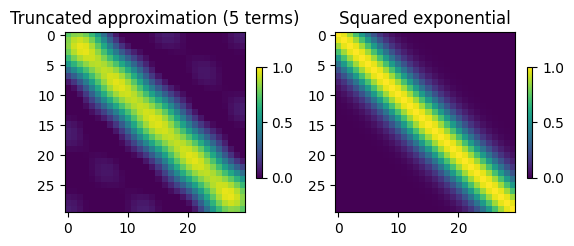

In [27]:
fig = plt.figure()
plt.subplot(121)
d = plt.imshow(K_approx, vmin=0, vmax=1)
plt.colorbar(d, shrink=0.3)
plt.title('Truncated approximation (5 terms)')

plt.subplot(122)
e = plt.imshow(K, vmin=0, vmax=1)
plt.colorbar(e, shrink=0.3)
plt.title('Squared exponential')
plt.show()